In [1]:
#Use the Simple Moving Average Crossover Startegy and Python to get buy and sell signals

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\sheha\anaconda3\envs\dojo-env\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\sheha\AppData\Local\Temp\ipykernel_15996\3340266671.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#get the stock data
file = 'SPY_5Y_Daily_candle.xlsx'
df =  pd.read_excel(file, sheet_name = 'original')
df

,Date,Open,High,Low,Close,% Change,% Change vs Average,Volume
0,2019-02-05T08:00:00.000Z,272.44,273.44,271.88,273.10,0.4192,0.3630,79552774
1,2019-02-06T08:00:00.000Z,272.79,273.34,271.92,272.74,-0.1318,-0.1880,58347791
2,2019-02-07T08:00:00.000Z,270.94,271.55,268.29,270.14,-0.9533,-1.0100,95481961
3,2019-02-08T08:00:00.000Z,268.75,270.58,267.83,270.47,0.1222,0.0660,75788861
4,2019-02-11T08:00:00.000Z,271.20,271.49,270.03,270.62,0.0555,-0.0007,68021423
...,...,...,...,...,...,...,...,...
1255,2024-01-31T08:00:00.000Z,488.62,489.08,482.86,482.88,-1.6300,-1.6900,126011062
1256,2024-02-01T08:00:00.000Z,484.63,489.23,483.80,489.20,1.3100,1.2500,91891637
1257,2024-02-02T08:00:00.000Z,489.65,496.05,489.30,494.35,1.0500,0.9966,99228192
1258,2024-02-05T08:00:00.000Z,493.69,494.38,490.23,492.55,-0.3641,-0.4203,75757102


In [4]:
#Extract the date only from 1st column
df['Date'] = pd.to_datetime(df['Date']).dt.date

#make 'Date' as index column
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,% Change,% Change vs Average,Volume
Date,,,,,,,
2019-02-05,272.44,273.44,271.88,273.10,0.4192,0.3630,79552774
2019-02-06,272.79,273.34,271.92,272.74,-0.1318,-0.1880,58347791
2019-02-07,270.94,271.55,268.29,270.14,-0.9533,-1.0100,95481961
2019-02-08,268.75,270.58,267.83,270.47,0.1222,0.0660,75788861
2019-02-11,271.20,271.49,270.03,270.62,0.0555,-0.0007,68021423
...,...,...,...,...,...,...,...
2024-01-31,488.62,489.08,482.86,482.88,-1.6300,-1.6900,126011062
2024-02-01,484.63,489.23,483.80,489.20,1.3100,1.2500,91891637
2024-02-02,489.65,496.05,489.30,494.35,1.0500,0.9966,99228192


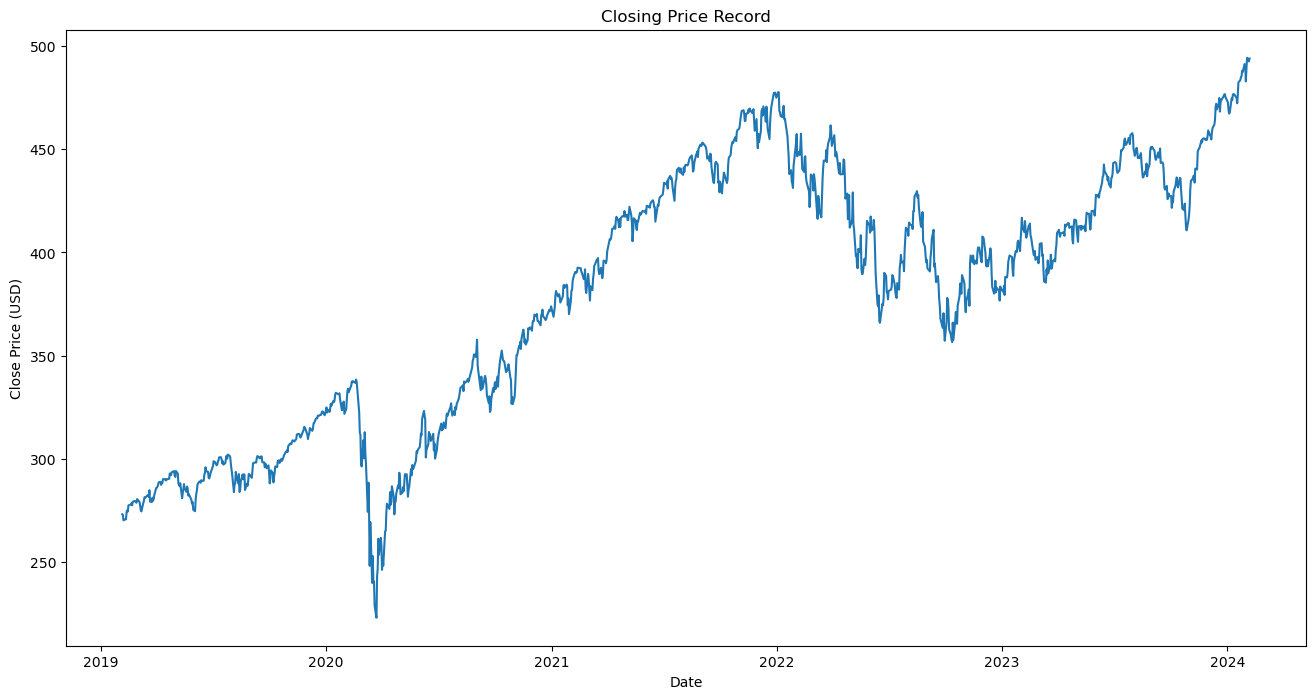

In [5]:
#Visualize the closing proce history
plt.figure(figsize=(16,8))
plt.title("Closing Price Record")
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

In [6]:
#creae calculate the simple moving average (SMA)
def SMA(data, period =30, column = 'Close'):
    return data[column].rolling(window=period).mean()

In [7]:
#create two ne cols to store the 20 day and 40 day SMA
df['SMA30']= SMA(df,30)
df['SMA50']=SMA(df,50)
df

,Open,High,Low,Close,% Change,% Change vs Average,Volume,SMA30,SMA50
Date,,,,,,,,,
2019-02-05,272.44,273.44,271.88,273.10,0.4192,0.3630,79552774,NaN,NaN
2019-02-06,272.79,273.34,271.92,272.74,-0.1318,-0.1880,58347791,NaN,NaN
2019-02-07,270.94,271.55,268.29,270.14,-0.9533,-1.0100,95481961,NaN,NaN
2019-02-08,268.75,270.58,267.83,270.47,0.1222,0.0660,75788861,NaN,NaN
2019-02-11,271.20,271.49,270.03,270.62,0.0555,-0.0007,68021423,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-01-31,488.62,489.08,482.86,482.88,-1.6300,-1.6900,126011062,477.353667,469.8636
2024-02-01,484.63,489.23,483.80,489.20,1.3100,1.2500,91891637,477.928000,470.6318
2024-02-02,489.65,496.05,489.30,494.35,1.0500,0.9966,99228192,478.578333,471.4336


In [8]:
#get the buy and sell signals
df['Signal'] = np.where(df['SMA30']>df['SMA50'],1,0)
df['Position'] = df['Signal'].diff()

df['Buy']= np.where(df['Position']==1, df['Close'], np.NAN)
df['Sell']= np.where(df['Position']==-1, df['Close'], np.NAN)


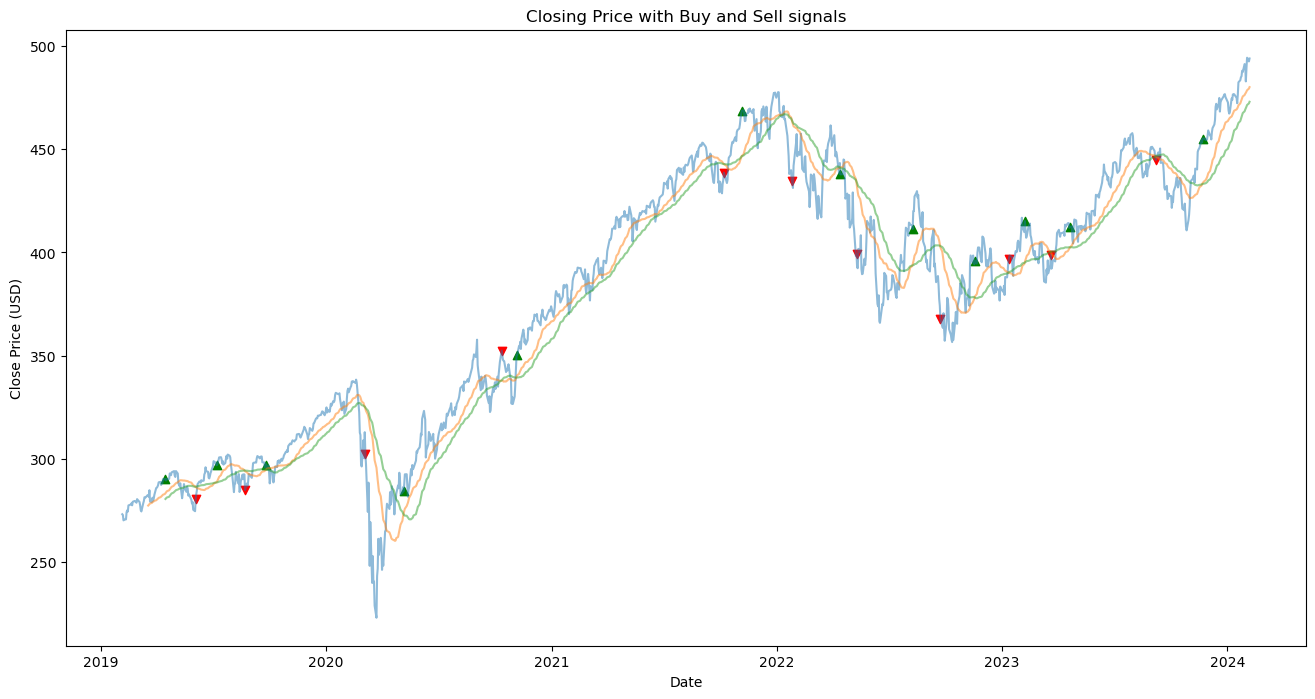

In [9]:
#visualize SMA and buy/sell signals
plt.figure(figsize=(16,8))
plt.title("Closing Price with Buy and Sell signals")
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.plot(df['SMA30'], alpha=0.5, label='SMA30')
plt.plot(df['SMA50'], alpha=0.5, label='SMA50')
plt.scatter(df.index,df['Buy'], alpha=1, label = 'Buy signal', marker='^',color ='green')
plt.scatter(df.index,df['Sell'], alpha=1, label = 'Sell signal', marker='v',color ='red')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()